# Graded Challenge 3
---
> Arief Luqmannurhakim
>
> Batch 001 -- FTDS

# Download Datasets
---

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nelrickeine","key":"0f603eceb6345956a665633e2947a56f"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-20 07:51:04           9618  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5858  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2171  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2466  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [5]:
!kaggle datasets download -d kemical/kickstarter-projects

 65% 24.0M/36.8M [00:00<00:00, 107MB/s] 
100% 36.8M/36.8M [00:00<00:00, 123MB/s]


# Import Libraries
---

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Read dataset
---
> Check columns information first

In [59]:
df = pd.read_csv('ks-projects-201801.csv', nrows=10)
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


> To reduce memory, declare initial data type

In [60]:
cols = {}
for col in df.columns:
  if df[col].dtypes == 'int':
    cols[col] = 'int32'
  elif df[col].dtypes == 'float':
    cols[col] = 'float32'
  else :
    cols[col] = 'string'

In [73]:
cols['ID'] = 'string'

In [74]:
cols

{'ID': 'string',
 'backers': 'int32',
 'category': 'string',
 'country': 'string',
 'currency': 'string',
 'deadline': 'string',
 'goal': 'float32',
 'launched': 'string',
 'main_category': 'string',
 'name': 'string',
 'pledged': 'float32',
 'state': 'string',
 'usd pledged': 'float32',
 'usd_goal_real': 'float32',
 'usd_pledged_real': 'float32'}

> Re-read csv file and use custom data type per column
>
> Use `chunksize` to reduce memory allocation

In [75]:
temp = []
df = pd.read_csv('ks-projects-201801.csv', dtype=cols, chunksize=5000)
for i in df:
  temp.append(i)

df_new = pd.concat(temp, axis=0, ignore_index=True)

df_new

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.949951
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.000000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.000000
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.000000
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.000000
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.000000


In [76]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  string 
 1   name              378657 non-null  string 
 2   category          378661 non-null  string 
 3   main_category     378661 non-null  string 
 4   currency          378661 non-null  string 
 5   deadline          378661 non-null  string 
 6   goal              378661 non-null  float32
 7   launched          378661 non-null  string 
 8   pledged           378661 non-null  float32
 9   state             378661 non-null  string 
 10  backers           378661 non-null  int32  
 11  country           378661 non-null  string 
 12  usd pledged       374864 non-null  float32
 13  usd_pledged_real  378661 non-null  float32
 14  usd_goal_real     378661 non-null  float32
dtypes: float32(5), int32(1), string(9)
memory usage: 34.7 MB


> **Drop all NaN values**
>
> And find Central Tendency --> mode for categorical

In [79]:
df_new.dropna(inplace=True)
df_new.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908178e+04,9.680105e+03,105.617476,7.034686e+03,9.056186e+03,4.546388e+04
std,1.182822e+06,9.553357e+04,907.185035,7.852406e+04,9.091480e+04,1.152421e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [177]:
df_new.loc[:, ['usd_goal_real', 'goal']].agg(['median', 'var'])

,usd_goal_real,goal
median,5.500000e+03,5.500000e+03
var,1.341492e+12,1.413223e+12


In [180]:
df_new.loc[:, ['name', 'category', 'main_category']].agg(['mode']).T

,,0,1
name,mode,Canceled (Canceled),New EP/Music Development
category,mode,Product Design,<NA>
main_category,mode,Film & Video,<NA>


# Plot category frequency 

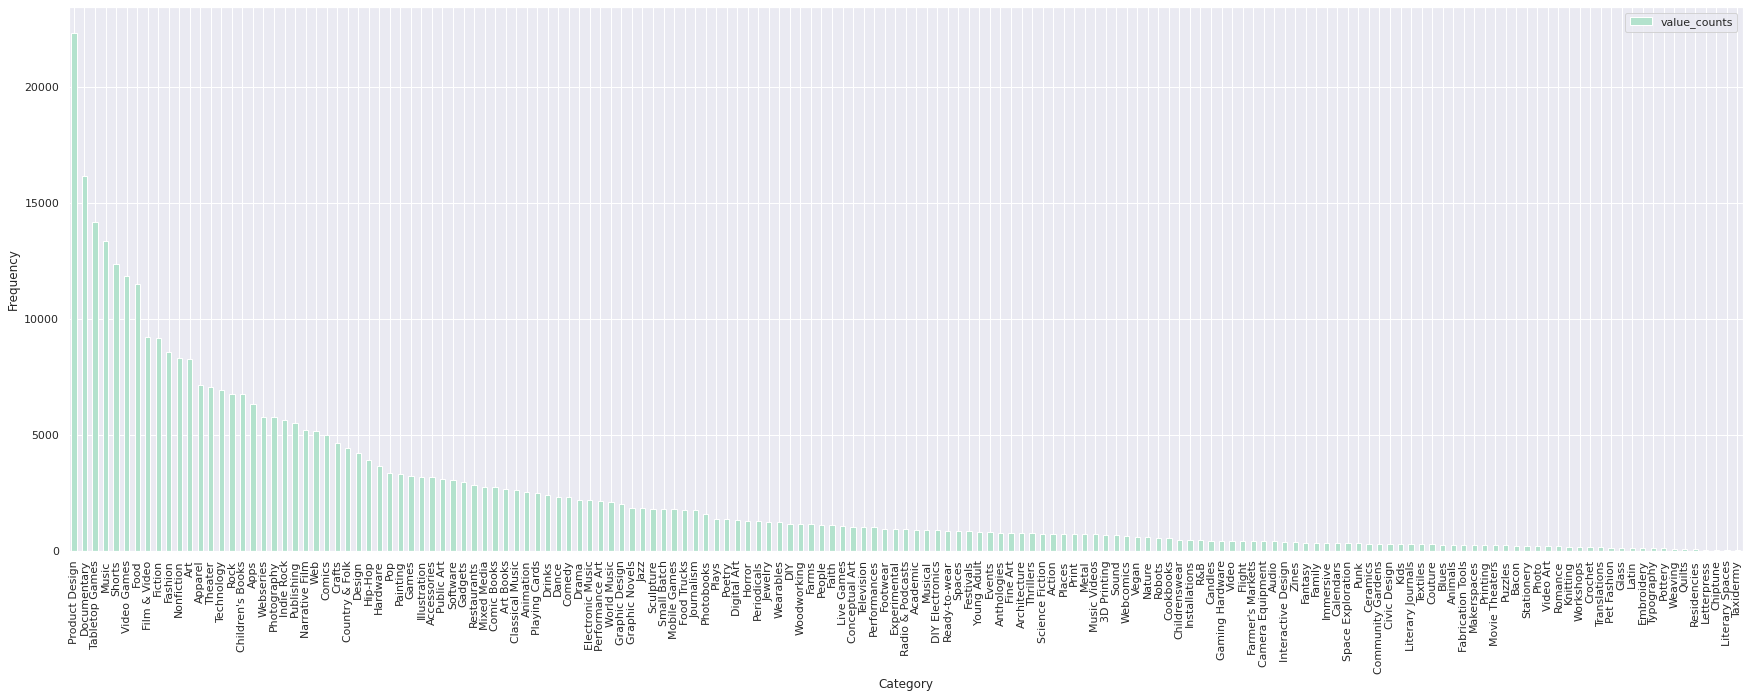

In [148]:
sns.set()
sns.set_palette(palette='Pastel2')
df_new['category'].agg(['value_counts']).plot(kind='bar', figsize=(30, 10))
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# See category that pledged more that $2million dollar 

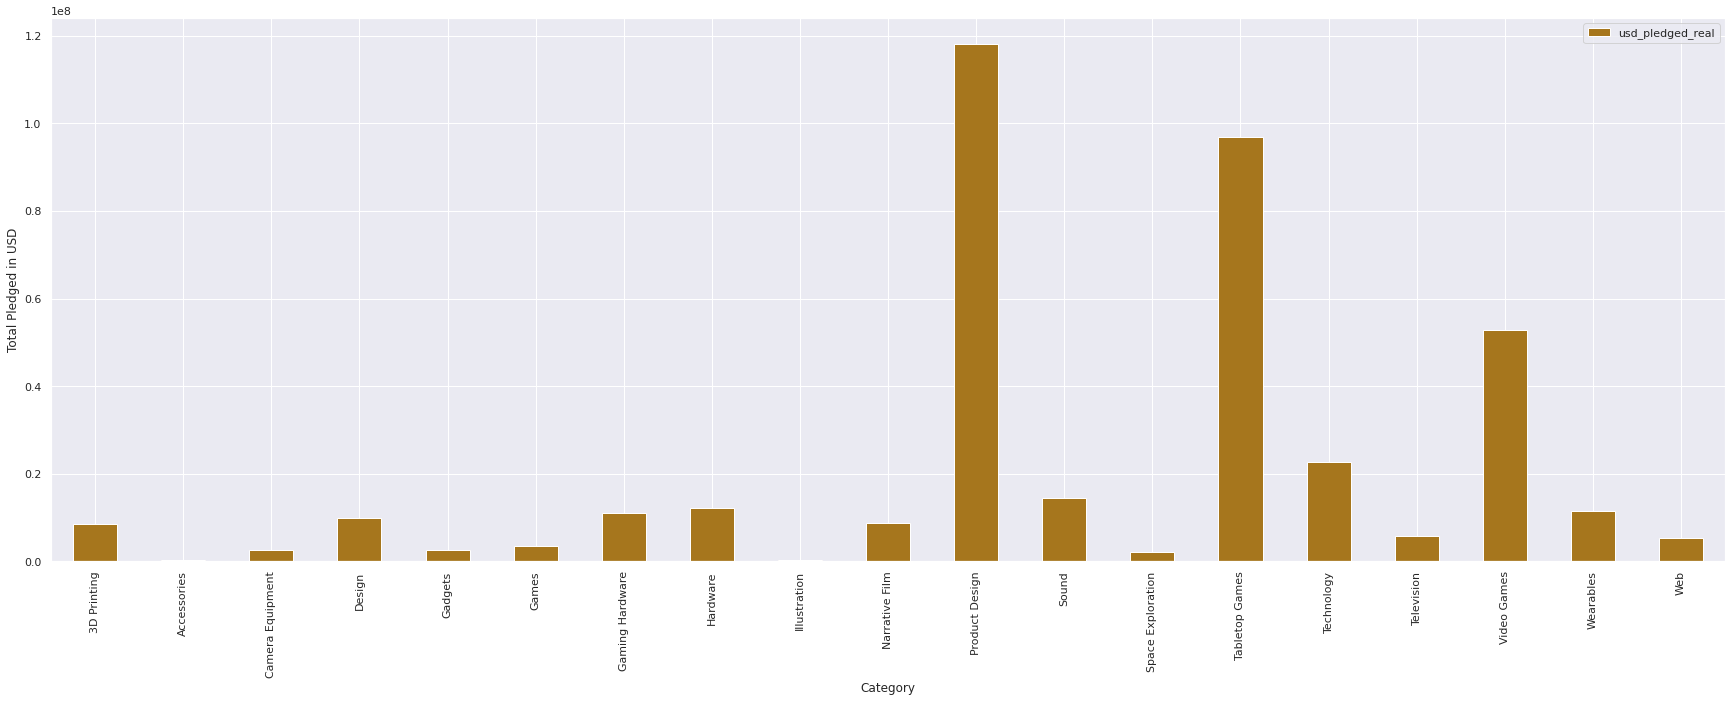

In [211]:
sns.set()
sns.set_palette(palette='Dark2_r')
df_new.loc[df_new['pledged'] > 2e6, ['category', 'usd_pledged_real']].groupby('category').sum().plot(kind='bar', figsize=(30, 10))
plt.xlabel('Category')
plt.ylabel('Total Pledged in USD')
plt.show()

# Hypothesis Testing with chi2
---
> Test column `Category` and `State` (**Test of Independence**)
>
> H0 : Choosing right Category doesn't have any effect to successful funding of Kickstarted project (**Independent**)
>
> H1 : Choosing right Category may affect or likely to success in Kickstarter project (**Dependent**)
>
> Confidence interval --> 95% and **5% of significance**
>
>**Reason**: Since Kickstarter sometimes related to Market condition, which mean there's high chance that kickstarter's **category** may lead to successful funding due to demand in Market or has great impact. Meaning that certain **Category** are likely to be more successful and get funding

> **Observed frequency**

In [257]:
observed_table = pd.crosstab(df_new['main_category'], df_new['state'], margins=True)
observed_table

state,canceled,failed,live,successful,suspended,All
main_category,,,,,,
Art,2222,14130,194,11510,96,28152
Comics,842,4036,76,5842,23,10819
Crafts,843,5703,76,2115,72,8809
Dance,163,1235,18,2338,13,3767
Design,4152,14814,305,10549,246,30066
Fashion,2650,14181,250,5593,138,22812
Film & Video,5744,32891,332,23612,117,62696
Food,2209,15969,183,6085,153,24599
Games,6199,16002,287,12518,219,35225


> Find **Expected frequency**

In [252]:
arr_chi = pd.crosstab(df_new['main_category'], df_new['state'], margins=True).values
denominator = arr_chi[-1, -1]
expected = np.zeros(tuple(np.array(arr_chi.shape) -1), dtype='float32')
for row in range(arr_chi.shape[0]-1):
  for col in range(arr_chi.shape[1] -1):

    expected[row, col] = arr_chi[row, -1] * arr_chi[-1, col] / denominator


In [294]:
index = pd.crosstab(df_new['main_category'], df_new['state'], margins=True).index[:-1]
column = pd.crosstab(df_new['main_category'], df_new['state'], margins=True).columns[:-1]
expected_table = pd.DataFrame(expected, index=index, columns=column)
expected_table = expected_table.applymap(lambda x: round(x, 3))
expected_table

state,canceled,failed,live,successful,suspended
main_category,,,,,
Art,2910.652,14840.594,210.130,10052.215,138.409
Comics,1118.583,5703.338,80.754,3863.133,53.192
Crafts,910.768,4643.748,65.751,3145.424,43.309
Dance,389.472,1985.810,28.117,1345.080,18.520
Design,3108.542,15849.577,224.416,10735.646,147.820
Fashion,2358.546,12025.562,170.271,8145.465,112.155
Film & Video,6482.177,33050.789,467.970,22386.816,308.245
Food,2543.305,12967.596,183.610,8783.548,120.941
Games,3641.934,18569.193,262.924,12577.767,173.184


In [ ]:
# expected_table['All'] = expected_table.sum(axis=1).map(lambda x: math.ceil(x))
# expected_table.loc['Total'] = expected_table.sum(axis=0).map(lambda x: math.ceil(x))
# expected_table

> Calculate the $chi^{2}$ value and its critical value with 56 degree of freedom
>
> $chi^{2} = \sum (observed - expected)^{2} / expected$

In [307]:
chi2_val = ((observed_table.loc['Art':'Theater', 'canceled':'suspended'] - expected_table)**2 / expected_table).sum().sum()
crit_val = stats.chi2.ppf(q = 0.95,  df= 56)
crit_val, chi2_val

(74.46832415930936, 21526.469356685993)

> Beacuse $Chi^{2}$ value is higher than critical value, We reject the null hypothesis
>
> Conclusion: 
>
>> H1 : Choosing right Category may affect or likely to success in Kickstarter project (**Dependent**)
>>
>> There are may not enough evidence that choosing right category is likely to be successful.